## ANI metric

The algorithm of counting ANI metric is outside this notebook!

Here are only data preparations and result analysing

If one wants to repeat the ANI counting, he should install <b>pyani</b> library: https://github.com/widdowquinn/pyani

And then call its component with nesessary flags and dirs:

> average_nucleotide_identity.py -i input_data/ -o output_dir_ANIm -m ANIm -g

-m stands for aling METHOD: (ANIm, ANIb, ANIblastall, TETRA) (more info is in pyani readme notes)

-g stands for graphics

In [3]:
import pandas as pd
import json
import os
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_dna
from IPython.core.display import Image

### 49 000 genes (data preparation)

In [113]:
df_1066_genes = pd.read_csv('util_data/all_genes.csv', header=None, index_col=None)

In [114]:
df_1066_genes.head()

,0,1,2,3
0,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,pgk,ATGAATAAGAAAACAGTAAAAGACATCGACGTAAAAGGCAAAGTCG...,"['ATG', 'ATGA', 'ATGAA', 'ATGAAT', 'ATGAATA', ..."
1,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplW,ATGAAAGATCCTCGTGATGTTCTTAAGCGCCCCGTCATTACTGAAC...,"['ATG', 'ATGA', 'ATGAA', 'ATGAAA', 'ATGAAAG', ..."
2,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplE,ATGAACCGCCTTAAAGAAAAGTACAATAAAGAAATTTCACCTGCTT...,"['ATG', 'ATGA', 'ATGAA', 'ATGAAC', 'ATGAACC', ..."
3,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplC,ATGACCAAAGGAATCTTAGGAAGAAAAATTGGTATGACGCAAGTAT...,"['ATG', 'ATGA', 'ATGAC', 'ATGACC', 'ATGACCA', ..."
4,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplF,ATGTCTCGTGTAGGTAAGAAACTGCTTGAGATCCCTTCTGAAGTTA...,"['ATG', 'ATGT', 'ATGTC', 'ATGTCT', 'ATGTCTC', ..."


In [115]:
df_1066_genes.shape

(1066, 4)

In [116]:
df_1066_genes = df_1066_genes.iloc[:, :3]

In [117]:
df_1066_genes.head()

,0,1,2
0,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,pgk,ATGAATAAGAAAACAGTAAAAGACATCGACGTAAAAGGCAAAGTCG...
1,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplW,ATGAAAGATCCTCGTGATGTTCTTAAGCGCCCCGTCATTACTGAAC...
2,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplE,ATGAACCGCCTTAAAGAAAAGTACAATAAAGAAATTTCACCTGCTT...
3,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplC,ATGACCAAAGGAATCTTAGGAAGAAAAATTGGTATGACGCAAGTAT...
4,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplF,ATGTCTCGTGTAGGTAAGAAACTGCTTGAGATCCCTTCTGAAGTTA...


In [10]:
df_1066_genes.iloc[:,0].unique()

array(['Bacillus_amyloliquefaciens_GCF_000196735.1_ASM19673v1_genomic',
       'Bacillus_atrophaeus_GCF_000742675.1_ASM74267v1_genomic',
       'Bacillus_halotolerans_GCF_001517105.1_ASM151710v1_genomic',
       'Bacillus_licheniformis_GCF_000011645.1_ASM1164v1_genomic',
       'Bacillus_mojavensis_GCF_000245335.1_ASM24533v1_genomic',
       'Bacillus_paralicheniformis_GCF_000408885.1_ASM40888v1_genomic',
       'Bacillus_siamensis_GCF_000262045.1_KCTC_13613_01_genomic',
       'Bacillus_sonorensis_GCF_002202015.1_ASM220201v1_genomic',
       'Bacillus_subtilis_GCF_000009045.1_ASM904v1_genomic',
       'Bacillus_tequilensis_GCF_000507145.1_KCTC_13622_01_genomic',
       'Bacillus_vallismortis_GCF_000245315.1_ASM24531v1_genomic',
       'Bacillus_velezensis_GCF_002117165.1_ASM211716v1_genomic'],
      dtype=object)

In [92]:
df_1066_genes.iloc[:,1].unique()

array(['pgk', 'rplW', 'rplE', 'rplC', 'rplF', 'rpsQ', 'rpsI', 'rpsH',
       'rpsK', 'rpsM', 'rplJ', 'argS', 'rpmI', 'rpsP', 'rpmC', 'prfA',
       'rpsT', 'ybeY', 'rplQ', 'rplR', 'rplU', 'rpmA', 'ftsY', 'rbfA',
       'smpB', 'ychF', 'tig', 'tsf', 'coaE', 'rplI', 'rpsR', 'rpsF',
       'infC', 'pyrG', 'alaS', 'dnaA', 'ileS', 'leuS', 'serS', 'truB',
       'cysS', 'hisS', 'aspS', 'fmt', 'pheS', 'pheT', 'infB', 'frr',
       'uvrB', 'ksgA', 'secG', 'rplL', 'nusG', 'rpsO', 'ffh', 'secA',
       'secY', 'rpsL', 'rpsC', 'rpsB', 'rpsD', 'rpsE', 'rplS', 'rpsG',
       'rplT', 'rplV', 'rpsJ', 'rpsS', 'rplM', 'rplN', 'rplO', 'rplX',
       'rplP', 'rplA', 'rplB', 'dnaG', 'lepA', 'rplK', 'nusA', 'recA',
       'rpoB', 'rpoA', 'rnc', 'rpoC', 'dnaX', 'tilS', 'cgtA', 'gmk',
       'engA', 'tsaD', 'rplD', 'ligA'], dtype=object)

In [ ]:
# rather long time

for i in range(df_1066_genes.shape[0]):
    id_seq = 'A_' + str(i).zfill(4)
    name = df_1066_genes.iloc[i, 1]
    seq = df_1066_genes.iloc[i, 2]
    
    desc = ('_').join(df_1066_genes.iloc[i,0].split('_')[0:2]) + '_' + name
    file_path = 'util_data/genes_1066/input_1066/' + desc + '.fasta'
    
    print(desc)
    print(id_seq, name)
    print(file_path)
    print()
    
    record = SeqRecord(Seq(seq),
                       id=id_seq, name=name,
                       description=desc)
    
    with open(file_path, 'w') as output_file:
        SeqIO.write(record, output_file, 'fasta')

### 49 000 genes (results)

#### ANIb (uses BLASTN+ to align 1020nt fragments of the input sequences)

In [14]:
df_anib = pd.read_csv('metric_ANI/genes_49000/output_bacills_12_ANIb/ANIb_percentage_identity.tab', sep='\t', index_col=0)

In [15]:
indxs = df_anib.index.str.split('_',2).str[0:2]
df_anib.index = ['_'.join(indx) for indx in indxs]

In [16]:
columns = df_anib.columns.str.split('_',2).str[0:2]
df_anib.columns = ['_'.join(col) for col in columns]

#### ANIblastall (uses legacy BLASTN to align 1020nt fragments of the input sequences)

In [17]:
df_aniblastall = pd.read_csv('metric_ANI/genes_49000/output_bacills_12_ANIblastall/ANIblastall_percentage_identity.tab',
                             sep='\t', index_col=0)

In [18]:
indxs = df_aniblastall.index.str.split('_',2).str[0:2]
df_aniblastall.index = ['_'.join(indx) for indx in indxs]

In [19]:
columns = df_aniblastall.columns.str.split('_',2).str[0:2]
df_aniblastall.columns = ['_'.join(col) for col in columns]

#### ANIm (uses MUMmer (NUCmer) to align the input sequences)

In [20]:
df_anim = pd.read_csv('metric_ANI/genes_49000/output_bacills_12_ANIm/ANIm_percentage_identity.tab',
                      sep='\t', index_col=0)

In [21]:
indxs = df_anim.index.str.split('_',2).str[0:2]
df_anim.index = ['_'.join(indx) for indx in indxs]

In [22]:
columns = df_anim.columns.str.split('_',2).str[0:2]
df_anim.columns = ['_'.join(col) for col in columns]

In [23]:
df_anib

,Bacillus_amyloliquefaciens,Bacillus_atrophaeus,Bacillus_halotolerans,Bacillus_licheniformis,Bacillus_mojavensis,Bacillus_paralicheniformis,Bacillus_siamensis,Bacillus_sonorensis,Bacillus_subtilis,Bacillus_tequilensis,Bacillus_vallismortis,Bacillus_velezensis
Bacillus_amyloliquefaciens,1.000000,0.787160,0.787471,0.751427,0.785730,0.751242,0.941548,0.751629,0.784134,0.787531,0.781626,0.942666
Bacillus_atrophaeus,0.787224,1.000000,0.812949,0.751816,0.812136,0.752044,0.786638,0.753379,0.805625,0.806060,0.803083,0.786073
Bacillus_halotolerans,0.786509,0.812333,1.000000,0.750895,0.959221,0.751411,0.786853,0.754122,0.875867,0.875349,0.871255,0.787223
Bacillus_licheniformis,0.751782,0.751834,0.751663,1.000000,0.751564,0.950052,0.751231,0.826578,0.751198,0.752253,0.748161,0.751634
Bacillus_mojavensis,0.785533,0.812206,0.960024,0.751789,1.000000,0.751810,0.786224,0.754353,0.874617,0.872760,0.869519,0.785796
Bacillus_paralicheniformis,0.750802,0.751661,0.751930,0.949997,0.751094,1.000000,0.751075,0.823453,0.750550,0.751517,0.747572,0.750896
Bacillus_siamensis,0.941112,0.786480,0.787355,0.750690,0.786045,0.750940,1.000000,0.750502,0.785142,0.789849,0.781579,0.945585
Bacillus_sonorensis,0.751278,0.753309,0.754555,0.826275,0.753807,0.822858,0.750269,1.000000,0.754433,0.754217,0.748516,0.750074
Bacillus_subtilis,0.783443,0.805377,0.875921,0.750838,0.873818,0.750589,0.784824,0.754498,1.000000,0.918790,0.912044,0.784835
Bacillus_tequilensis,0.787469,0.806077,0.875817,0.752004,0.872465,0.751523,0.790141,0.754349,0.919444,1.000000,0.911088,0.788650


In [24]:
df_aniblastall

,Bacillus_amyloliquefaciens,Bacillus_atrophaeus,Bacillus_halotolerans,Bacillus_licheniformis,Bacillus_mojavensis,Bacillus_paralicheniformis,Bacillus_siamensis,Bacillus_sonorensis,Bacillus_subtilis,Bacillus_tequilensis,Bacillus_vallismortis,Bacillus_velezensis
Bacillus_amyloliquefaciens,1.000000,0.776387,0.774735,0.727169,0.773231,0.726868,0.939255,0.727442,0.770675,0.774550,0.766652,0.941426
Bacillus_atrophaeus,0.775527,1.000000,0.806842,0.729104,0.805074,0.729427,0.774574,0.731256,0.798002,0.798875,0.794580,0.774873
Bacillus_halotolerans,0.772823,0.805886,1.000000,0.726926,0.957616,0.726249,0.772868,0.730408,0.873574,0.872559,0.866756,0.773612
Bacillus_licheniformis,0.726688,0.729493,0.728310,1.000000,0.727862,0.948338,0.726319,0.820948,0.727502,0.727861,0.723928,0.726658
Bacillus_mojavensis,0.773047,0.805701,0.958709,0.727702,1.000000,0.727191,0.773126,0.731681,0.873107,0.870066,0.865792,0.773065
Bacillus_paralicheniformis,0.725429,0.728479,0.726826,0.947130,0.726040,1.000000,0.725374,0.817807,0.726284,0.726806,0.721779,0.725248
Bacillus_siamensis,0.937947,0.774394,0.773771,0.725792,0.773192,0.725820,1.000000,0.725593,0.770220,0.776811,0.767357,0.944815
Bacillus_sonorensis,0.725555,0.729919,0.729514,0.818594,0.729347,0.816405,0.724263,1.000000,0.729022,0.728895,0.722805,0.723732
Bacillus_subtilis,0.769563,0.797760,0.873656,0.726894,0.872023,0.727226,0.770089,0.730945,1.000000,0.916206,0.907249,0.770505
Bacillus_tequilensis,0.773152,0.798973,0.873581,0.727005,0.869783,0.726763,0.776444,0.730125,0.917171,1.000000,0.906552,0.775239


In [25]:
df_anim

,Bacillus_amyloliquefaciens,Bacillus_atrophaeus,Bacillus_halotolerans,Bacillus_licheniformis,Bacillus_mojavensis,Bacillus_paralicheniformis,Bacillus_siamensis,Bacillus_sonorensis,Bacillus_subtilis,Bacillus_tequilensis,Bacillus_vallismortis,Bacillus_velezensis
Bacillus_amyloliquefaciens,1.000000,0.853656,0.860962,0.848028,0.859184,0.852404,0.942735,0.848965,0.859000,0.865381,0.854282,0.943874
Bacillus_atrophaeus,0.853656,1.000000,0.861680,0.851793,0.864781,0.855411,0.853450,0.854874,0.857815,0.857650,0.856396,0.854387
Bacillus_halotolerans,0.860962,0.861680,1.000000,0.851063,0.960329,0.857750,0.862992,0.854082,0.887178,0.886297,0.882842,0.863609
Bacillus_licheniformis,0.848028,0.851793,0.851063,1.000000,0.853955,0.951029,0.850692,0.871095,0.858535,0.856266,0.858367,0.853053
Bacillus_mojavensis,0.859184,0.864781,0.960329,0.853955,1.000000,0.857344,0.860359,0.853109,0.885986,0.884052,0.881434,0.859743
Bacillus_paralicheniformis,0.852404,0.855411,0.857750,0.951029,0.857344,1.000000,0.855026,0.868896,0.858878,0.858515,0.856306,0.851910
Bacillus_siamensis,0.942735,0.853450,0.862992,0.850692,0.860359,0.855026,1.000000,0.851263,0.865835,0.877306,0.860855,0.946564
Bacillus_sonorensis,0.848965,0.854874,0.854082,0.871095,0.853109,0.868896,0.851263,1.000000,0.853690,0.853516,0.846554,0.848087
Bacillus_subtilis,0.859000,0.857815,0.887178,0.858535,0.885986,0.858878,0.865835,0.853690,1.000000,0.921259,0.914710,0.864872
Bacillus_tequilensis,0.865381,0.857650,0.886297,0.856266,0.884052,0.858515,0.877306,0.853516,0.921259,1.000000,0.914123,0.870273


### 1066 genes (data preparation)

In [118]:
df_1066_genes.head()

,0,1,2
0,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,pgk,ATGAATAAGAAAACAGTAAAAGACATCGACGTAAAAGGCAAAGTCG...
1,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplW,ATGAAAGATCCTCGTGATGTTCTTAAGCGCCCCGTCATTACTGAAC...
2,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplE,ATGAACCGCCTTAAAGAAAAGTACAATAAAGAAATTTCACCTGCTT...
3,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplC,ATGACCAAAGGAATCTTAGGAAGAAAAATTGGTATGACGCAAGTAT...
4,Bacillus_amyloliquefaciens_GCF_000196735.1_ASM...,rplF,ATGTCTCGTGTAGGTAAGAAACTGCTTGAGATCCCTTCTGAAGTTA...


In [119]:
df_1066_genes['org_name'] = df_1066_genes[0].apply(lambda s: '_'.join(s.split('_')[0:2]))

In [120]:
df_1066_genes.drop(columns=0, inplace=True)

In [121]:
df_1066_genes.columns = ['gene_name', 'gene_seq', 'org_name']
df_1066_genes.head()

,gene_name,gene_seq,org_name
0,pgk,ATGAATAAGAAAACAGTAAAAGACATCGACGTAAAAGGCAAAGTCG...,Bacillus_amyloliquefaciens
1,rplW,ATGAAAGATCCTCGTGATGTTCTTAAGCGCCCCGTCATTACTGAAC...,Bacillus_amyloliquefaciens
2,rplE,ATGAACCGCCTTAAAGAAAAGTACAATAAAGAAATTTCACCTGCTT...,Bacillus_amyloliquefaciens
3,rplC,ATGACCAAAGGAATCTTAGGAAGAAAAATTGGTATGACGCAAGTAT...,Bacillus_amyloliquefaciens
4,rplF,ATGTCTCGTGTAGGTAAGAAACTGCTTGAGATCCCTTCTGAAGTTA...,Bacillus_amyloliquefaciens


In [123]:
gene_names = df_1066_genes['gene_name'].unique()
gene_names

array(['pgk', 'rplW', 'rplE', 'rplC', 'rplF', 'rpsQ', 'rpsI', 'rpsH',
       'rpsK', 'rpsM', 'rplJ', 'argS', 'rpmI', 'rpsP', 'rpmC', 'prfA',
       'rpsT', 'ybeY', 'rplQ', 'rplR', 'rplU', 'rpmA', 'ftsY', 'rbfA',
       'smpB', 'ychF', 'tig', 'tsf', 'coaE', 'rplI', 'rpsR', 'rpsF',
       'infC', 'pyrG', 'alaS', 'dnaA', 'ileS', 'leuS', 'serS', 'truB',
       'cysS', 'hisS', 'aspS', 'fmt', 'pheS', 'pheT', 'infB', 'frr',
       'uvrB', 'ksgA', 'secG', 'rplL', 'nusG', 'rpsO', 'ffh', 'secA',
       'secY', 'rpsL', 'rpsC', 'rpsB', 'rpsD', 'rpsE', 'rplS', 'rpsG',
       'rplT', 'rplV', 'rpsJ', 'rpsS', 'rplM', 'rplN', 'rplO', 'rplX',
       'rplP', 'rplA', 'rplB', 'dnaG', 'lepA', 'rplK', 'nusA', 'recA',
       'rpoB', 'rpoA', 'rnc', 'rpoC', 'dnaX', 'tilS', 'cgtA', 'gmk',
       'engA', 'tsaD', 'rplD', 'ligA'], dtype=object)

### bcg files (from jenkins) = 1066 genes

In [90]:
bpe_data_1['data_structure']

{'gene_name': ['n_genes',
  ['feature_index', 'nuc_sequence', 'pro_sequence', 'e_value']]}

In [92]:
bpe_data_1['n_genes']

92

In [97]:
path = 'util_data/extract_output/'
full_paths = [path + f for f in os.listdir(path) if f.endswith('.bcg')]
full_paths

['util_data/extract_output/Bacillus_amyloliquefaciens.bcg',
 'util_data/extract_output/Bacillus_atrophaeus.bcg',
 'util_data/extract_output/Bacillus_halotolerans.bcg',
 'util_data/extract_output/Bacillus_licheniformis.bcg',
 'util_data/extract_output/Bacillus_mojavensis.bcg',
 'util_data/extract_output/Bacillus_paralicheniformis.bcg',
 'util_data/extract_output/Bacillus_siamensis.bcg',
 'util_data/extract_output/Bacillus_sonorensis.bcg',
 'util_data/extract_output/Bacillus_subtilis.bcg',
 'util_data/extract_output/Bacillus_tequilensis.bcg',
 'util_data/extract_output/Bacillus_vallismortis.bcg',
 'util_data/extract_output/Bacillus_velezensis.bcg']

In [163]:
for org_id, path in enumerate(full_paths):
    records = []
    org_name = path.split('/')[-1].split('.')[0]
    with open(path, 'r') as bcg_file:
        bcg_data = json.load(bcg_file)
        for gene_id, gene_name in enumerate(gene_names):
            if gene_name in bcg_data['data']:
                records.append(SeqRecord(Seq(bcg_data['data'][gene_name][1]['nuc_sequence'],
                                             generic_dna),
                                         id='A_' + str(gene_id).zfill(2) + '_' + gene_name,
                                         description='|'+str(org_id)+'_'+org_name+'_'+gene_name))
    
    write_path = 'metric_ANI/genes_1066/fasta_genes_1066/' + org_name + '.fasta'
    with open(write_path, 'w') as output_file:
        SeqIO.write(records, output_file, 'fasta')

### 1066 genes (results)

In [2]:
df_anib_1066 = pd.read_csv('metric_ANI/genes_1066/output_genes_1066_ANIb/ANIb_percentage_identity.tab', sep='\t', index_col=0)

In [5]:
df_aniblastall_1066 = pd.read_csv('metric_ANI/genes_1066/output_genes_1066_ANIblastall/ANIblastall_percentage_identity.tab', sep='\t', index_col=0)

In [7]:
df_anim_1066 = pd.read_csv('metric_ANI/genes_1066/output_genes_1066_ANIm/ANIm_percentage_identity.tab', sep='\t', index_col=0)

### 49000 genes results vs 1066 genes results

<b>The values of ANI metric is higher on 1066 genes, than on 49000 genes</b>

It's because in the set of 1066 there are almost same 92 genes (in some organisms there are all of 92 genes, in others - some of them)

The set with 49000 genes has a lot more different genes, so the organisms differs more.

##### ANIb

In [23]:
df_anib

,Bacillus_amyloliquefaciens,Bacillus_atrophaeus,Bacillus_halotolerans,Bacillus_licheniformis,Bacillus_mojavensis,Bacillus_paralicheniformis,Bacillus_siamensis,Bacillus_sonorensis,Bacillus_subtilis,Bacillus_tequilensis,Bacillus_vallismortis,Bacillus_velezensis
Bacillus_amyloliquefaciens,1.000000,0.787160,0.787471,0.751427,0.785730,0.751242,0.941548,0.751629,0.784134,0.787531,0.781626,0.942666
Bacillus_atrophaeus,0.787224,1.000000,0.812949,0.751816,0.812136,0.752044,0.786638,0.753379,0.805625,0.806060,0.803083,0.786073
Bacillus_halotolerans,0.786509,0.812333,1.000000,0.750895,0.959221,0.751411,0.786853,0.754122,0.875867,0.875349,0.871255,0.787223
Bacillus_licheniformis,0.751782,0.751834,0.751663,1.000000,0.751564,0.950052,0.751231,0.826578,0.751198,0.752253,0.748161,0.751634
Bacillus_mojavensis,0.785533,0.812206,0.960024,0.751789,1.000000,0.751810,0.786224,0.754353,0.874617,0.872760,0.869519,0.785796
Bacillus_paralicheniformis,0.750802,0.751661,0.751930,0.949997,0.751094,1.000000,0.751075,0.823453,0.750550,0.751517,0.747572,0.750896
Bacillus_siamensis,0.941112,0.786480,0.787355,0.750690,0.786045,0.750940,1.000000,0.750502,0.785142,0.789849,0.781579,0.945585
Bacillus_sonorensis,0.751278,0.753309,0.754555,0.826275,0.753807,0.822858,0.750269,1.000000,0.754433,0.754217,0.748516,0.750074
Bacillus_subtilis,0.783443,0.805377,0.875921,0.750838,0.873818,0.750589,0.784824,0.754498,1.000000,0.918790,0.912044,0.784835
Bacillus_tequilensis,0.787469,0.806077,0.875817,0.752004,0.872465,0.751523,0.790141,0.754349,0.919444,1.000000,0.911088,0.788650


In [4]:
df_anib_1066

,Bacillus_amyloliquefaciens,Bacillus_atrophaeus,Bacillus_halotolerans,Bacillus_licheniformis,Bacillus_mojavensis,Bacillus_paralicheniformis,Bacillus_siamensis,Bacillus_sonorensis,Bacillus_subtilis,Bacillus_tequilensis,Bacillus_vallismortis,Bacillus_velezensis
Bacillus_amyloliquefaciens,1.000000,0.873540,0.879207,0.830002,0.880562,0.831123,0.972250,0.830290,0.877525,0.878033,0.853636,0.972933
Bacillus_atrophaeus,0.873465,1.000000,0.891602,0.828719,0.892685,0.829537,0.873848,0.828785,0.886376,0.885064,0.864423,0.874595
Bacillus_halotolerans,0.879203,0.891600,1.000000,0.829788,0.980933,0.829335,0.880193,0.832254,0.937105,0.936215,0.920083,0.880575
Bacillus_licheniformis,0.830051,0.828822,0.829774,1.000000,0.831178,0.971295,0.829748,0.901310,0.830341,0.830310,0.805346,0.829990
Bacillus_mojavensis,0.879967,0.892552,0.980554,0.832248,1.000000,0.831479,0.880718,0.832901,0.936808,0.934863,0.918698,0.881741
Bacillus_paralicheniformis,0.831145,0.829566,0.829357,0.971236,0.830706,1.000000,0.830194,0.899023,0.830436,0.830802,0.805882,0.830732
Bacillus_siamensis,0.972243,0.873909,0.880189,0.829760,0.881185,0.830178,1.000000,0.829285,0.878508,0.879544,0.855685,0.972724
Bacillus_sonorensis,0.830171,0.828637,0.832198,0.901234,0.831940,0.899003,0.829192,1.000000,0.830451,0.829894,0.806600,0.828896
Bacillus_subtilis,0.877509,0.886366,0.937108,0.830347,0.936840,0.830401,0.878511,0.830454,1.000000,0.958735,0.945552,0.878351
Bacillus_tequilensis,0.878026,0.885070,0.936215,0.830315,0.934863,0.830764,0.879541,0.830012,0.958727,1.000000,0.943873,0.878653


##### ANIblastall

In [24]:
df_aniblastall

,Bacillus_amyloliquefaciens,Bacillus_atrophaeus,Bacillus_halotolerans,Bacillus_licheniformis,Bacillus_mojavensis,Bacillus_paralicheniformis,Bacillus_siamensis,Bacillus_sonorensis,Bacillus_subtilis,Bacillus_tequilensis,Bacillus_vallismortis,Bacillus_velezensis
Bacillus_amyloliquefaciens,1.000000,0.776387,0.774735,0.727169,0.773231,0.726868,0.939255,0.727442,0.770675,0.774550,0.766652,0.941426
Bacillus_atrophaeus,0.775527,1.000000,0.806842,0.729104,0.805074,0.729427,0.774574,0.731256,0.798002,0.798875,0.794580,0.774873
Bacillus_halotolerans,0.772823,0.805886,1.000000,0.726926,0.957616,0.726249,0.772868,0.730408,0.873574,0.872559,0.866756,0.773612
Bacillus_licheniformis,0.726688,0.729493,0.728310,1.000000,0.727862,0.948338,0.726319,0.820948,0.727502,0.727861,0.723928,0.726658
Bacillus_mojavensis,0.773047,0.805701,0.958709,0.727702,1.000000,0.727191,0.773126,0.731681,0.873107,0.870066,0.865792,0.773065
Bacillus_paralicheniformis,0.725429,0.728479,0.726826,0.947130,0.726040,1.000000,0.725374,0.817807,0.726284,0.726806,0.721779,0.725248
Bacillus_siamensis,0.937947,0.774394,0.773771,0.725792,0.773192,0.725820,1.000000,0.725593,0.770220,0.776811,0.767357,0.944815
Bacillus_sonorensis,0.725555,0.729919,0.729514,0.818594,0.729347,0.816405,0.724263,1.000000,0.729022,0.728895,0.722805,0.723732
Bacillus_subtilis,0.769563,0.797760,0.873656,0.726894,0.872023,0.727226,0.770089,0.730945,1.000000,0.916206,0.907249,0.770505
Bacillus_tequilensis,0.773152,0.798973,0.873581,0.727005,0.869783,0.726763,0.776444,0.730125,0.917171,1.000000,0.906552,0.775239


In [6]:
df_aniblastall_1066

,Bacillus_amyloliquefaciens,Bacillus_atrophaeus,Bacillus_halotolerans,Bacillus_licheniformis,Bacillus_mojavensis,Bacillus_paralicheniformis,Bacillus_siamensis,Bacillus_sonorensis,Bacillus_subtilis,Bacillus_tequilensis,Bacillus_vallismortis,Bacillus_velezensis
Bacillus_amyloliquefaciens,1.000000,0.872275,0.878527,0.827332,0.879630,0.827922,0.972237,0.827423,0.876598,0.876944,0.852593,0.972931
Bacillus_atrophaeus,0.872200,1.000000,0.891312,0.824656,0.892264,0.825373,0.872547,0.825517,0.885827,0.884669,0.863975,0.873583
Bacillus_halotolerans,0.878524,0.891311,1.000000,0.826401,0.980934,0.826336,0.879603,0.828398,0.937102,0.936190,0.920083,0.880082
Bacillus_licheniformis,0.827382,0.824760,0.826394,1.000000,0.827843,0.971295,0.827394,0.901134,0.827827,0.827349,0.801931,0.827477
Bacillus_mojavensis,0.879060,0.891954,0.980562,0.829014,1.000000,0.828907,0.880311,0.829406,0.936867,0.934865,0.918982,0.880791
Bacillus_paralicheniformis,0.827944,0.825402,0.826358,0.971235,0.828063,1.000000,0.827434,0.898721,0.827910,0.827627,0.801847,0.827856
Bacillus_siamensis,0.972231,0.872640,0.879619,0.827405,0.880784,0.827418,1.000000,0.827112,0.878092,0.879056,0.854860,0.972723
Bacillus_sonorensis,0.827258,0.825397,0.828340,0.901056,0.828369,0.898701,0.826995,1.000000,0.827509,0.827529,0.803536,0.826998
Bacillus_subtilis,0.876593,0.885819,0.937105,0.827834,0.936840,0.827878,0.878076,0.827515,1.000000,0.958661,0.945553,0.877840
Bacillus_tequilensis,0.876937,0.884675,0.936190,0.827366,0.934820,0.827610,0.879053,0.827648,0.958652,1.000000,0.943774,0.877999


##### ANIm

In [25]:
df_anim

,Bacillus_amyloliquefaciens,Bacillus_atrophaeus,Bacillus_halotolerans,Bacillus_licheniformis,Bacillus_mojavensis,Bacillus_paralicheniformis,Bacillus_siamensis,Bacillus_sonorensis,Bacillus_subtilis,Bacillus_tequilensis,Bacillus_vallismortis,Bacillus_velezensis
Bacillus_amyloliquefaciens,1.000000,0.853656,0.860962,0.848028,0.859184,0.852404,0.942735,0.848965,0.859000,0.865381,0.854282,0.943874
Bacillus_atrophaeus,0.853656,1.000000,0.861680,0.851793,0.864781,0.855411,0.853450,0.854874,0.857815,0.857650,0.856396,0.854387
Bacillus_halotolerans,0.860962,0.861680,1.000000,0.851063,0.960329,0.857750,0.862992,0.854082,0.887178,0.886297,0.882842,0.863609
Bacillus_licheniformis,0.848028,0.851793,0.851063,1.000000,0.853955,0.951029,0.850692,0.871095,0.858535,0.856266,0.858367,0.853053
Bacillus_mojavensis,0.859184,0.864781,0.960329,0.853955,1.000000,0.857344,0.860359,0.853109,0.885986,0.884052,0.881434,0.859743
Bacillus_paralicheniformis,0.852404,0.855411,0.857750,0.951029,0.857344,1.000000,0.855026,0.868896,0.858878,0.858515,0.856306,0.851910
Bacillus_siamensis,0.942735,0.853450,0.862992,0.850692,0.860359,0.855026,1.000000,0.851263,0.865835,0.877306,0.860855,0.946564
Bacillus_sonorensis,0.848965,0.854874,0.854082,0.871095,0.853109,0.868896,0.851263,1.000000,0.853690,0.853516,0.846554,0.848087
Bacillus_subtilis,0.859000,0.857815,0.887178,0.858535,0.885986,0.858878,0.865835,0.853690,1.000000,0.921259,0.914710,0.864872
Bacillus_tequilensis,0.865381,0.857650,0.886297,0.856266,0.884052,0.858515,0.877306,0.853516,0.921259,1.000000,0.914123,0.870273


In [8]:
df_anim_1066

,Bacillus_amyloliquefaciens,Bacillus_atrophaeus,Bacillus_halotolerans,Bacillus_licheniformis,Bacillus_mojavensis,Bacillus_paralicheniformis,Bacillus_siamensis,Bacillus_sonorensis,Bacillus_subtilis,Bacillus_tequilensis,Bacillus_vallismortis,Bacillus_velezensis
Bacillus_amyloliquefaciens,1.000000,0.888075,0.893746,0.888354,0.892074,0.879156,0.967970,0.879164,0.888748,0.889908,0.871064,0.968951
Bacillus_atrophaeus,0.888075,1.000000,0.891116,0.868204,0.896806,0.887073,0.883633,0.882116,0.889047,0.888003,0.871681,0.891324
Bacillus_halotolerans,0.893746,0.891116,1.000000,0.877724,0.977560,0.874996,0.892462,0.878167,0.928160,0.927880,0.915454,0.888185
Bacillus_licheniformis,0.888354,0.868204,0.877724,1.000000,0.879397,0.967318,0.887208,0.895251,0.874684,0.874734,0.870666,0.882156
Bacillus_mojavensis,0.892074,0.896806,0.977560,0.879397,1.000000,0.875374,0.893757,0.868349,0.927794,0.926743,0.913800,0.893409
Bacillus_paralicheniformis,0.879156,0.887073,0.874996,0.967318,0.875374,1.000000,0.886175,0.893662,0.873581,0.872436,0.857577,0.883793
Bacillus_siamensis,0.967970,0.883633,0.892462,0.887208,0.893757,0.886175,1.000000,0.882935,0.891713,0.891742,0.872526,0.967936
Bacillus_sonorensis,0.879164,0.882116,0.878167,0.895251,0.868349,0.893662,0.882935,1.000000,0.881760,0.877030,0.860221,0.878833
Bacillus_subtilis,0.888748,0.889047,0.928160,0.874684,0.927794,0.873581,0.891713,0.881760,1.000000,0.953097,0.940702,0.893506
Bacillus_tequilensis,0.889908,0.888003,0.927880,0.874734,0.926743,0.872436,0.891742,0.877030,0.953097,1.000000,0.939344,0.893523


### Images for 1066 genes results

#### ANIb

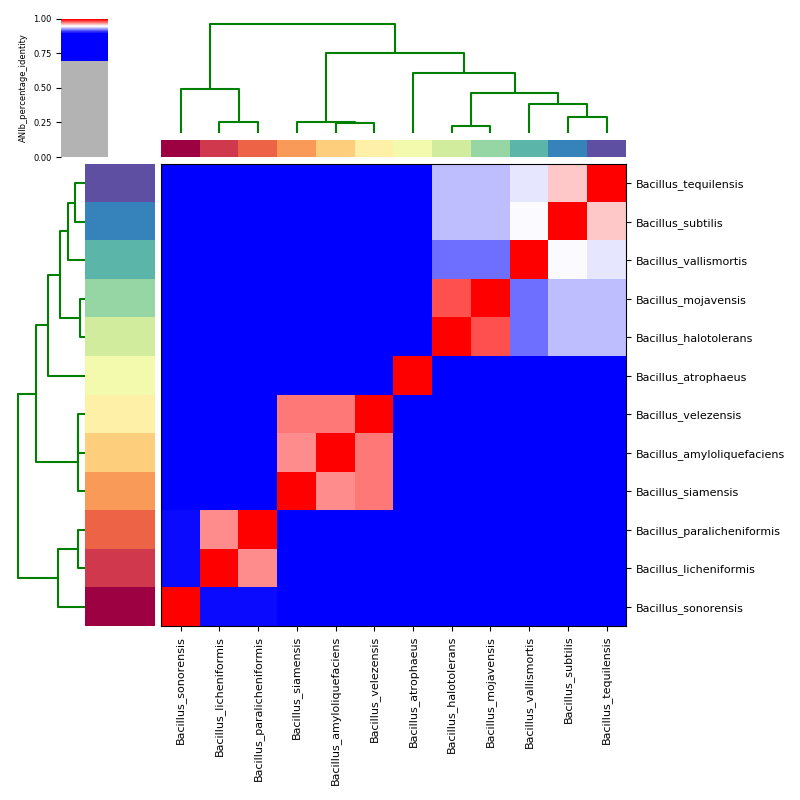

In [5]:
#Image(filename=('util_data/output_genes_1066_ANIb/ANIb_percentage_identity.png'))
Image(filename=('../data/metric_ANI/genes_1066/output_genes_1066_ANIb/ANIb_percentage_identity.png'))

#### ANIblastall

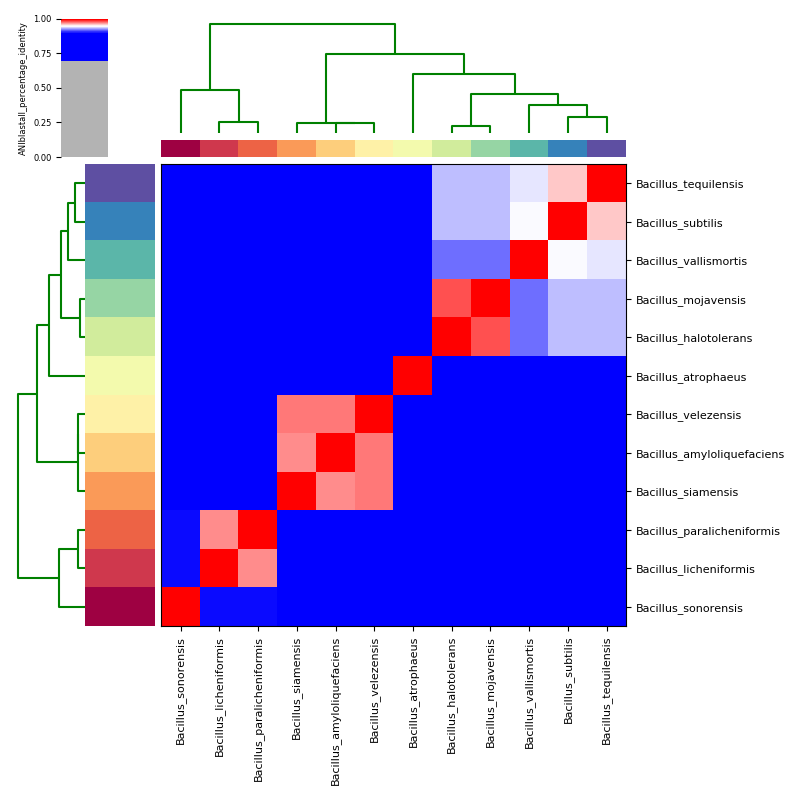

In [4]:
#Image(filename=('util_data/output_genes_1066_ANIblastall/ANIblastall_percentage_identity.png'))
Image(filename=('../data/metric_ANI/genes_1066/output_genes_1066_ANIblastall/ANIblastall_percentage_identity.png'))

#### ANIm

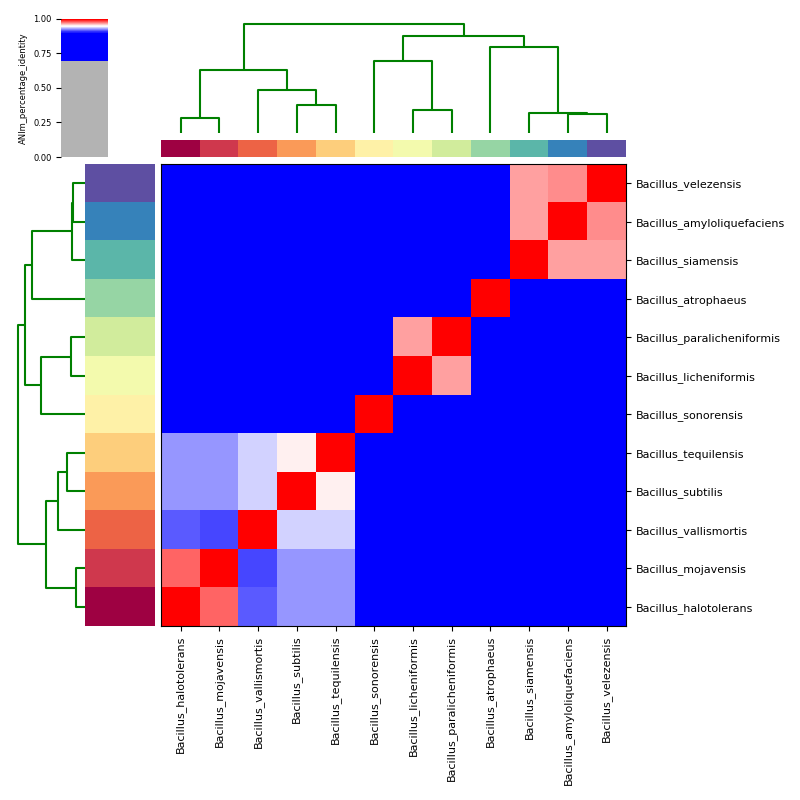

In [2]:
#Image(filename=('util_data/output_genes_1066_ANIm/ANIm_percentage_identity.png'))
Image(filename=('../data/metric_ANI/genes_1066/output_genes_1066_ANIm/ANIm_percentage_identity.png'))